# Diwali Sales DataSet - EDA

### Step - 1 Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step - 2 Read the file

In [ ]:
df = pd.read_csv("diwali_cleaned.csv", encoding="cp1252")

### Step - 3 Basic Commands

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,Teenager,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,Adult,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,Adult,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,Teenager,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,Teenager,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11234,1000695,Manning,P00296942,M,Teenager,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11235,1004089,Reichenbach,P00171342,M,Adult,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11236,1001209,Oshin,P00201342,F,Adult,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11237,1004023,Noonan,P00059442,M,Adult,37,0,Karnataka,Southern,Agriculture,Office,3,206.0
11238,1002744,Brumley,P00281742,F,Teenager,19,0,Maharashtra,Western,Healthcare,Office,3,188.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df.shape

(11239, 13)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


- Data is Already Cleaned

### Step - 4 EDA Starts

- Distribution of Gender

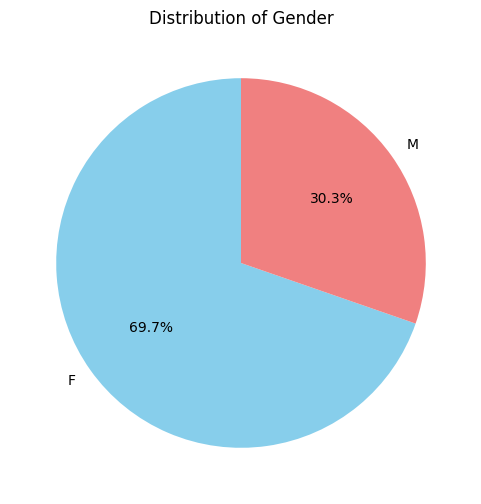

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Gender")
plt.show()

- Distribution of Age Group

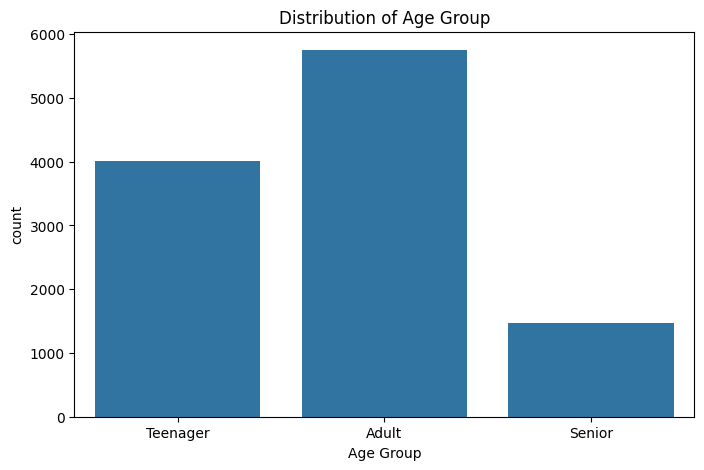

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age Group')
plt.title("Distribution of Age Group")
plt.show()

- Distribution of Marital Status

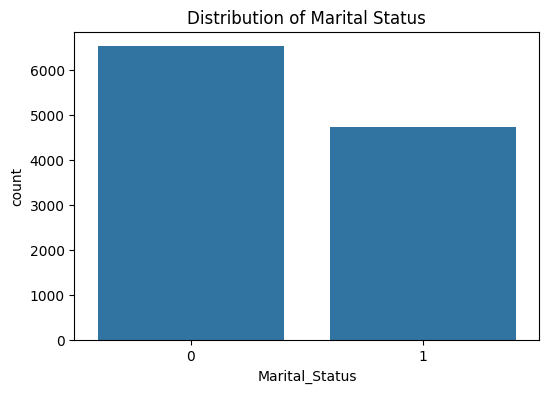

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status')
plt.title("Distribution of Marital Status")
plt.show()

- Distribution of State

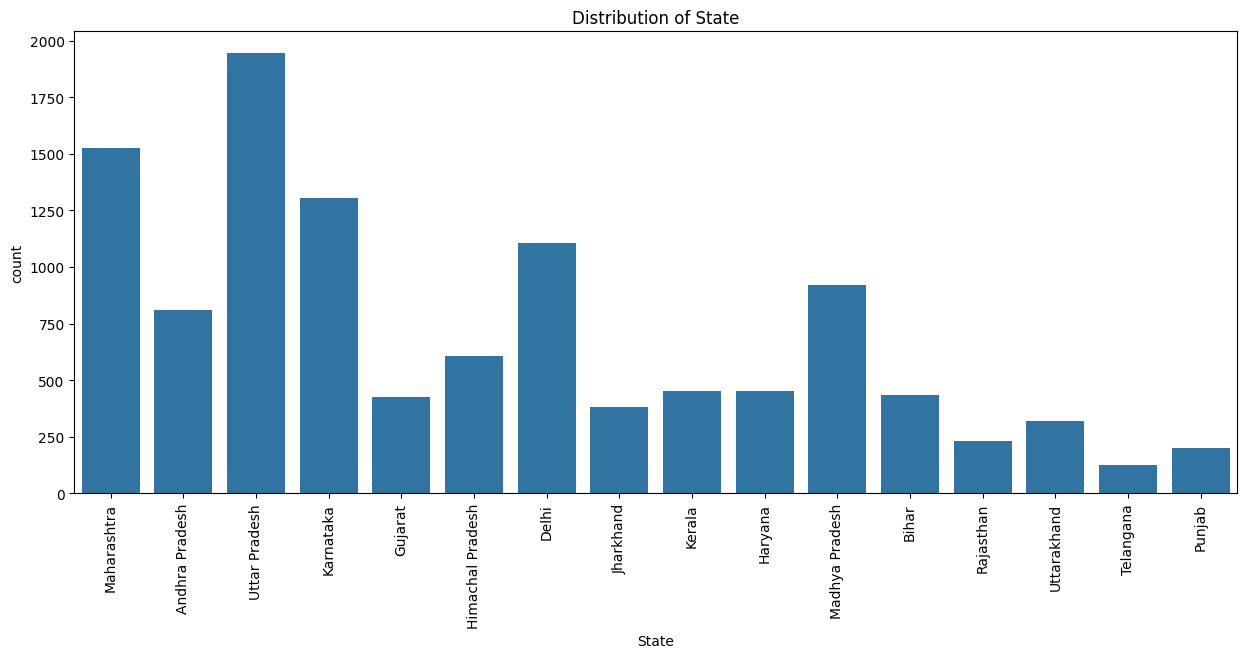

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='State')
plt.title("Distribution of State")
plt.xticks(rotation=90)
plt.show()

- Age Group vs. Amount

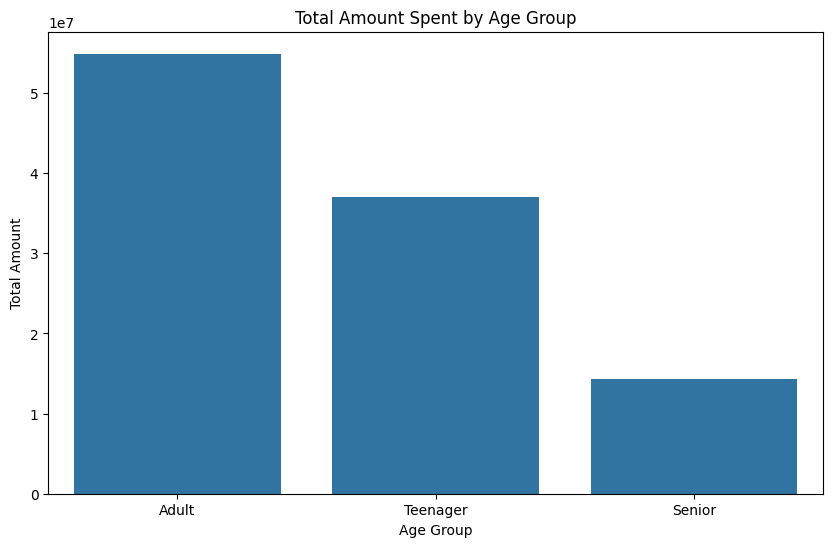

In [ ]:
age_group_amount = df.groupby('Age Group')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_amount, x='Age Group', y='Amount', order=age_group_amount.sort_values('Amount', ascending=False)['Age Group'])
plt.title("Total Amount Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()

- Gender vs. Amount

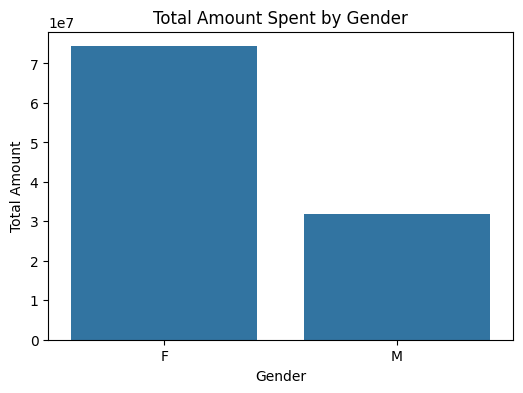

In [ ]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_amount, x='Gender', y='Amount')
plt.title("Total Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

- Occupation vs. Amount

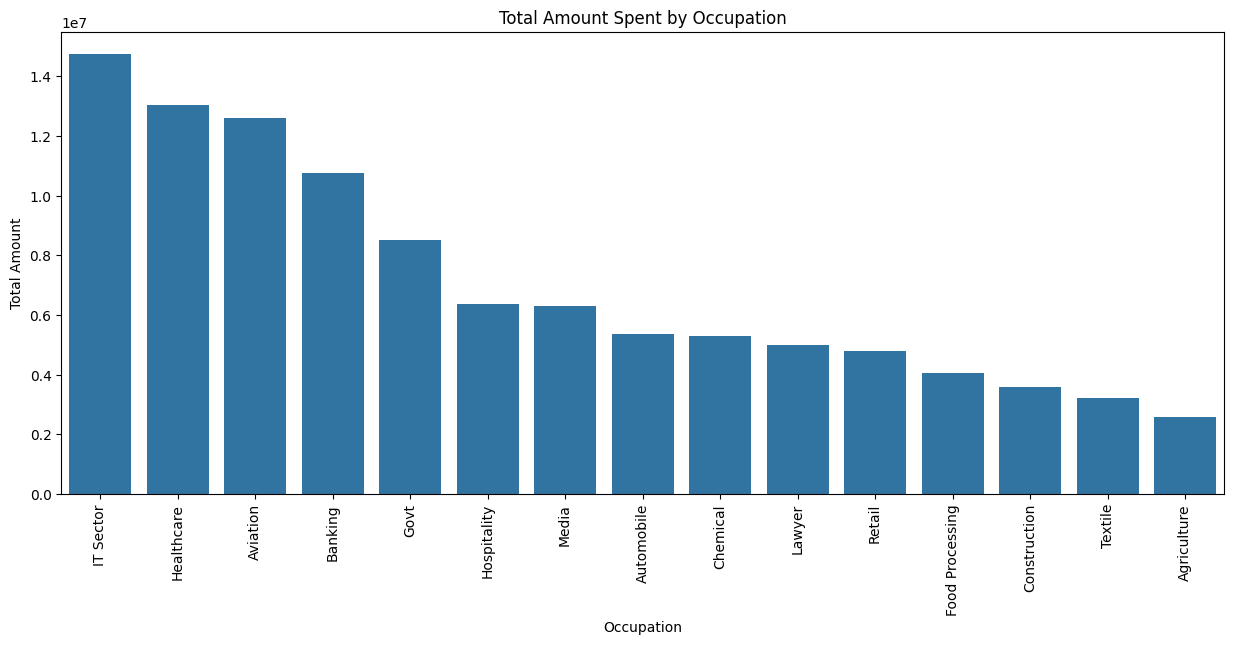

In [ ]:
occupation_amount = df.groupby('Occupation')['Amount'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=occupation_amount, x='Occupation', y='Amount', order=occupation_amount.sort_values('Amount', ascending=False)['Occupation'])
plt.title("Total Amount Spent by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.show()

- Product Category vs. Amount

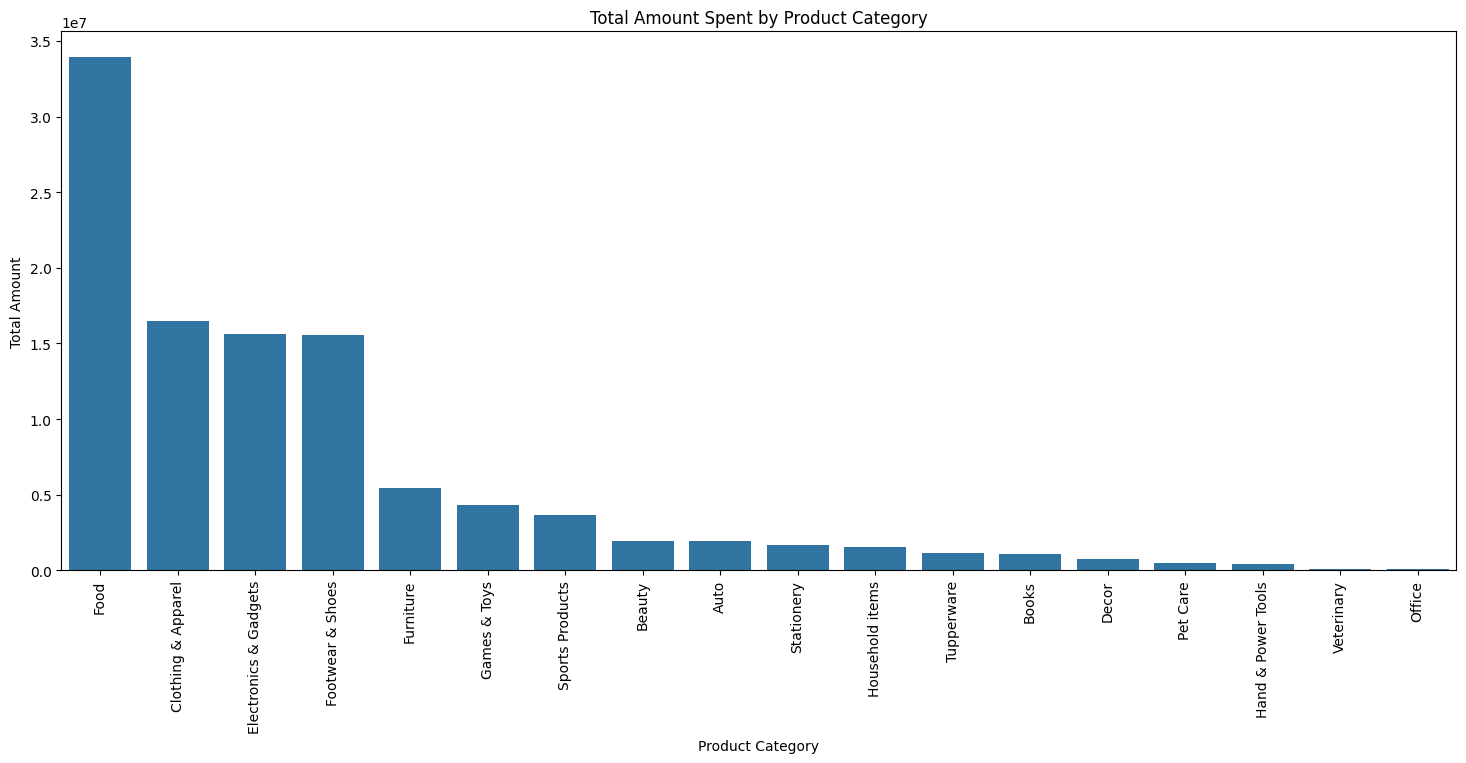

In [ ]:
product_amount = df.groupby('Product_Category')['Amount'].sum().reset_index()

plt.figure(figsize=(18, 7))
sns.barplot(data=product_amount, x='Product_Category', y='Amount', order=product_amount.sort_values('Amount', ascending=False)['Product_Category'])
plt.title("Total Amount Spent by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.show()

- Zone vs. Amount

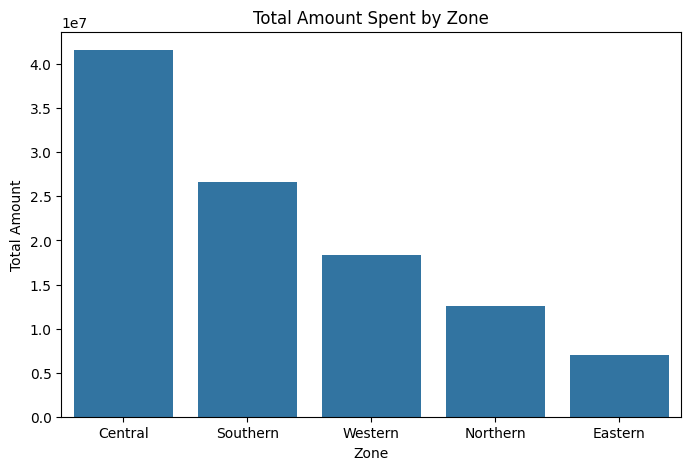

In [ ]:
zone_amount = df.groupby('Zone')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=zone_amount, x='Zone', y='Amount', order=zone_amount.sort_values('Amount', ascending=False)['Zone'])
plt.title("Total Amount Spent by Zone")
plt.xlabel("Zone")
plt.ylabel("Total Amount")
plt.show()

- State vs. Amount

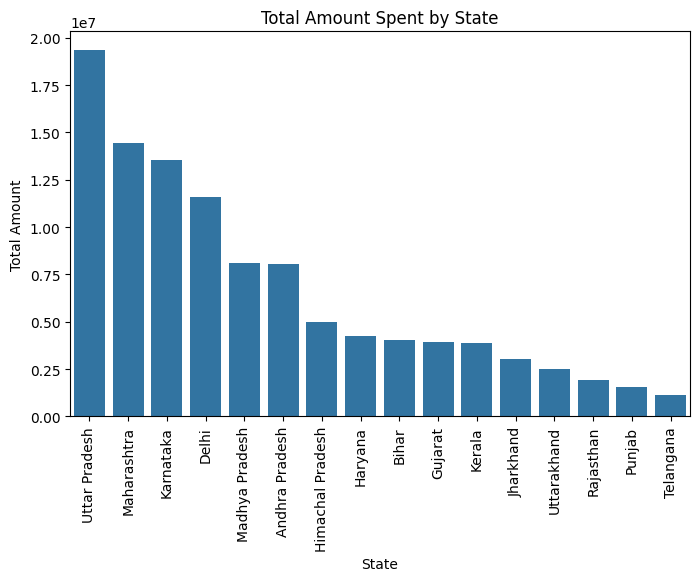

In [ ]:
zone_amount = df.groupby('State')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=zone_amount, x='State', y='Amount', order=zone_amount.sort_values('Amount', ascending=False)['State'])
plt.title("Total Amount Spent by State")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.show()

- Marital Status vs. Amount

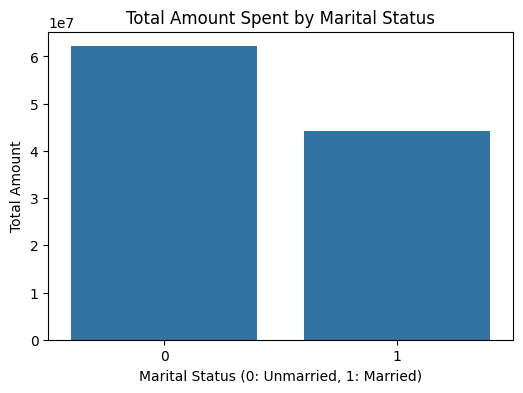

In [ ]:
marital_status_amount = df.groupby('Marital_Status')['Amount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=marital_status_amount, x='Marital_Status', y='Amount')
plt.title("Total Amount Spent by Marital Status")
plt.xlabel("Marital Status (0: Unmarried, 1: Married)")
plt.ylabel("Total Amount")
plt.show()

- Correlation Heatmap

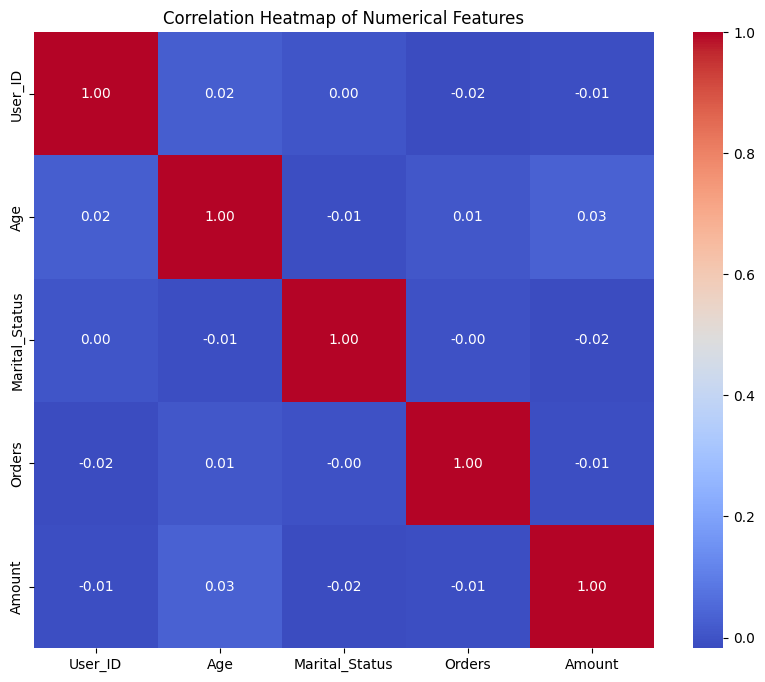

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Top 10 States by Sales Amount

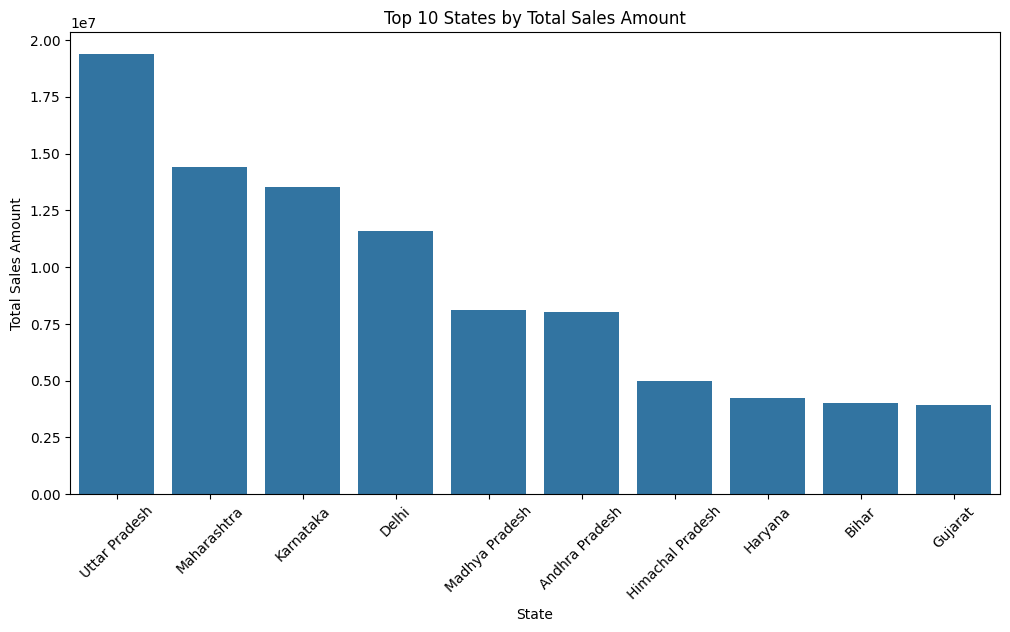

In [ ]:
state_amount = df.groupby('State')['Amount'].sum().reset_index()
top_10_states = state_amount.sort_values('Amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='State', y='Amount')
plt.title("Top 10 States by Total Sales Amount")
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

## Key Analysis

### Age group spend
- Adults contribute the highest total spend, followed by Teenagers, with Seniors far behind; focus promotions on Adults for maximum revenue lift.
- The count distribution shows Adults are the largest customer group, then Teenagers, then Seniors; segment sizes partly explain the spend pattern.

### Gender insights
- Females account for a much larger share of total spending than males; female-focused campaigns and assortments are likely to perform better.
- The customer mix is also skewed toward females (~70%), reinforcing that the higher spend is not only per-person behavior but also population share.

### Marital status
- Unmarried customers drive more total spend than married customers; student/young professional targeting can be prioritized.
- The population count shows more unmarried customers than married, which helps explain the higher aggregate spend from the unmarried group.

### Geography: states and zones
- Uttar Pradesh leads total sales, followed by Maharashtra and Karnataka; these should be top-priority markets for inventory and marketing.
- A top-10 state view confirms the same leaders and highlights Delhi and Madhya Pradesh as strong contributors; consider regionalized campaigns in these states.
- By zone, Central is the highest-spending region, then Southern and Western; Eastern is the smallest, suggesting growth headroom but lower current returns.
- State-wise customer counts are broad-based but concentrated in Uttar Pradesh, Maharashtra, Karnataka, and Delhi; ensure logistics and stock depth in these hubs.

### Product category
- Food is the dominant revenue category by a wide margin, with Clothing & Apparel, Electronics & Gadgets, and Footwear & Shoes forming the next tier; prioritize assortment and promotions in these top four.
- Long-tail categories (e.g., Books, Decor, Pet Care, Hand & Power Tools) contribute relatively little; manage inventory tightly and use cross-sell from top categories to lift them.

### Occupation
- Customers from IT, Healthcare, and Aviation show the highest total spend; premium and tech-forward offers should be tailored to these professional groups.
- Lower-spend occupations like Agriculture, Textile, and Construction may need price-sensitive bundles or localized merchandising to improve conversion.

### Correlation heatmap
- Correlations among numeric fields are very weak, including between Orders and Amount; this suggests spend variability isn’t linearly explained by simple counts or age alone and calls for richer features or non-linear models.
- User_ID has near-zero correlation with all features as expected; remove it from predictive modeling to avoid noise.